#Inference with nnU-Net v2 3D fullres

*Source: Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211*

*https://github.com/MIC-DKFZ/nnUNet*

####1. Installing Requirements

In [1]:
!pip install -q nnunetv2 nibabel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 10.0 MB/s eta 0:00:00


####2. Setting environment variables

In [2]:
import os

os.environ["nnUNet_raw"] = "/content/nnUNet_raw"
os.environ["nnUNet_preprocessed"] = "/content/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/content/nnUNet_results"

# create folders
for path in [os.environ["nnUNet_preprocessed"], os.environ["nnUNet_results"]]:
    os.makedirs(path, exist_ok=True)

####3. Downloading Dataset

In [3]:
!pip install wldhx.yadisk-direct
!yadisk-direct https://disk.360.yandex.ru/d/rkyXsb1lKRNryQ > direct_link.txt
!cat direct_link.txt
!wget -O test_nnunet.zip "$(cat direct_link.txt)"

https://downloader.disk.yandex.ru/disk/a7acad90578ac731eea2726d92565f568049788a47677f61f4f4e5e77241c256/694d4025/fKqInKw3d7bLFOeFnMGnhKicotXSLTkNP2d60utyRRdokE7VDMRXpkVM0h7xR0lE6xhMUgOE312FAxSQJHq-VygSEAUwUDZT9ZzyCTSsZ0yr8npumZHI4midPdWhecNq?uid=0&filename=test_gt_3d.zip&disposition=attachment&hash=qYuqGhpuYwmtwBRSCijFDDH2n%2BSUQ9qOs0blx6adZGNKpjsVQL28eFgkm1ZswG6ttFP6gwbjvtaafTptcua4SA%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=1130000067809040&fsize=1530916602&hid=44fa448de0a9241c22583c0495ba714a&media_type=compressed&tknv=v3
--2025-12-25 09:46:14--  https://downloader.disk.yandex.ru/disk/a7acad90578ac731eea2726d92565f568049788a47677f61f4f4e5e77241c256/694d4025/fKqInKw3d7bLFOeFnMGnhKicotXSLTkNP2d60utyRRdokE7VDMRXpkVM0h7xR0lE6xhMUgOE312FAxSQJHq-VygSEAUwUDZT9ZzyCTSsZ0yr8npumZHI4midPdWhecNq?uid=0&filename=test_gt_3d.zip&disposition=attachment&hash=qYuqGhpuYwmtwBRSCijFDDH2n%2BSUQ9qOs0blx6adZGNKpjsVQL28eFgkm1ZswG6ttFP6gwbjvtaafTptcua4SA%3D%3D%3A&limit=0&content_type=applicat

In [4]:
!unzip 'test_nnunet.zip'

Archive:  test_nnunet.zip
   creating: test_gt_3d/
  inflating: __MACOSX/._test_gt_3d   
   creating: test_gt_3d/nnUNet_raw/
  inflating: __MACOSX/test_gt_3d/._nnUNet_raw  
  inflating: test_gt_3d/.DS_Store    
  inflating: __MACOSX/test_gt_3d/._.DS_Store  
  inflating: test_gt_3d/checkpoint_best.pth  
  inflating: __MACOSX/test_gt_3d/._checkpoint_best.pth  
  inflating: test_gt_3d/dataset_fingerprint.json  
  inflating: __MACOSX/test_gt_3d/._dataset_fingerprint.json  
   creating: test_gt_3d/gt_labels/
  inflating: __MACOSX/test_gt_3d/._gt_labels  
  inflating: test_gt_3d/plans.json   
  inflating: __MACOSX/test_gt_3d/._plans.json  
  inflating: test_gt_3d/dataset.json  
  inflating: __MACOSX/test_gt_3d/._dataset.json  
  inflating: test_gt_3d/nnUNet_raw/.DS_Store  
  inflating: __MACOSX/test_gt_3d/nnUNet_raw/._.DS_Store  
   creating: test_gt_3d/nnUNet_raw/Dataset500_BraTS2021/
  inflating: __MACOSX/test_gt_3d/nnUNet_raw/._Dataset500_BraTS2021  
  inflating: test_gt_3d/gt_labels/BraT

In [7]:
# Create the full structure
!cp -r '/content/test_gt_3d/nnUNet_raw' '/content/nnUNet_raw'

!mkdir -p /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0

# Copy model weights into fold_0
!cp /content/test_gt_3d/checkpoint_best.pth \
    /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/

# Copy JSON config files into the config folder
!cp /content/test_gt_3d/plans.json \
    /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__3d_fullres/

!cp /content/test_gt_3d/dataset.json \
    /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__3d_fullres/

!cp /content/test_gt_3d/dataset_fingerprint.json \
    /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__3d_fullres/

####4. Testing

In [8]:
!nnUNetv2_predict \
  -d 500 \
  -i /content/nnUNet_raw/Dataset500_BraTS2021/imagesTs \
  -o /content/brats_test_preds \
  -f 0 \
  -c 3d_fullres \
  -chk /content/nnUNet_results/Dataset500_BraTS2021/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/checkpoint_best.pth \
  --save_probabilities


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 125 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 125 cases that I would like to predict

Predicting BraTS_0010:
perform_everything_on_device: True
100% 8/8 [00:19<00:00,  2.49s/it]
sending off prediction to background worker for resampling and export
done with BraTS_0010

Predicting BraTS_0020:
perform_everything_on_device: True
100% 8/8 [00:18<00:00,  2.34s/it]
sending off prediction to background worker for resampling and export
done with BraTS_0020

Predicting BraTS_0030:
perform_everything_on_device: True
100%

####5. Evaluation

In [9]:
!pip install medpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for medpy: filename=MedPy-0.5.2-py3-none-any.whl size=224710 sha256=31799f8340190a1e7d765798de06244dd4adf398d423c934a8f983dcc4cefef2
  Stored in directory: /root/.cache/pip/wheels/89/5a/f8/b3def53b9c2133d2f8698ea2173bb5df63bd8e761ce8e9aec9
Successfully built medpy


In [11]:
import pandas as pd
import numpy as np
import nibabel as nib
from medpy.metric.binary import dc, hd95

GT = "/content/test_gt_3d/gt_labels"
PRED = "/content/brats_test_preds"  # prediction folder

def load(path):
    return nib.load(path).get_fdata().astype(np.uint8)

def region(mask, labels):
    return np.isin(mask, labels).astype(np.uint8)

def nii_files(folder):
    return sorted(
        f for f in os.listdir(folder)
        if f.endswith(".nii.gz")
    )

regions = {
    "WT": [1, 2, 3],
    "TC": [1, 3],
    "ET": [3]
}

rows = []

gt_files = nii_files(GT)
pred_files = nii_files(PRED)

if set(gt_files) != set(pred_files):
    raise ValueError("GT and prediction filenames do not match!")

for fname in gt_files:
    gt_path = os.path.join(GT, fname)
    pred_path = os.path.join(PRED, fname)

    # Load GT with header for spacing
    gt_nii = nib.load(gt_path)
    gt = gt_nii.get_fdata().astype(np.uint8)
    pr = load(pred_path)

    # Voxel spacing (sx, sy, sz)
    voxel_spacing = gt_nii.header.get_zooms()[:3]

    for rname, lbls in regions.items():
        gt_r = region(gt, lbls)
        pr_r = region(pr, lbls)

        if gt_r.sum() == 0 and pr_r.sum() == 0:
            d, h = 1.0, 0.0
        elif gt_r.sum() == 0:
            d, h = 0.0, np.inf
        else:
            if pr_r.sum() == 0:
                d, h = 0.0, np.inf
            else:
                d = dc(pr_r, gt_r)
                h = hd95(pr_r, gt_r, voxelspacing=voxel_spacing)

        rows.append({
            "case": fname[:-7],
            "region": rname,
            "dice": d,
            "hd95": h if np.isfinite(h) else 373.13,
        })

df = pd.DataFrame(rows)

summary = df.groupby("region")[["dice", "hd95"]].mean()
print("\n Test Set Scores (Mean per Region) ")
print(summary)

mean_wt = df[df['region'] == 'WT']['dice'].mean()
mean_tc = df[df['region'] == 'TC']['dice'].mean()
mean_et = df[df['region'] == 'ET']['dice'].mean()
brats_score = (mean_wt + mean_tc + mean_et) / 3
print(f"\nOverall mean Dice (WT/TC/ET): {brats_score:.4f}")

df.to_csv('/content/brats_test_scores_full.csv', index=False)
print("\nFull results saved to /content/brats_test_scores_full.csv")


 Test Set Scores (Mean per Region) 
            dice      hd95
region                    
ET      0.857042  8.930255
TC      0.923045  3.296101
WT      0.939056  3.450133

Overall mean Dice (WT/TC/ET): 0.9064

Full results saved to /content/brats_test_scores_full.csv


####6. 3D Volume Visualization

In [ ]:
import plotly.graph_objects as go
from skimage.measure import marching_cubes
from plotly.subplots import make_subplots

# Settings
CASE_ID = "BraTS_0080"
IMAGES_TS_DIR = "/content/nnUNet_raw/Dataset500_BraTS2021/imagesTs"
GT_DIR = "/content/test_gt_3d/gt_labels"
PR_DIR = "/content/brats_test_preds"

# Load data
gt = nib.load(os.path.join(GT_DIR, f"{CASE_ID}.nii.gz")).get_fdata().astype(np.uint8)
pr = nib.load(os.path.join(PR_DIR, f"{CASE_ID}.nii.gz")).get_fdata().astype(np.uint8)

t1ce = nib.load(
    os.path.join(IMAGES_TS_DIR, f"{CASE_ID}_0002.nii.gz")
).get_fdata()

# Brain mesh
brain = t1ce > np.percentile(t1ce[t1ce > 0], 20)
verts_b, faces_b, _, _ = marching_cubes(brain.astype(np.uint8), level=0.5)

brain_mesh = dict(
    x=verts_b[:,0], y=verts_b[:,1], z=verts_b[:,2],
    i=faces_b[:,0], j=faces_b[:,1], k=faces_b[:,2],
    color="lightgray",
    opacity=0.2,
    name="Brain"
)

# Tumor mesh
def mesh_from_label(vol, label, color, name, opacity=0.6):
    if np.sum(vol == label) == 0:
        return None
    verts, faces, _, _ = marching_cubes((vol == label).astype(np.uint8), level=0.5)
    return go.Mesh3d(
        x=verts[:,0], y=verts[:,1], z=verts[:,2],
        i=faces[:,0], j=faces[:,1], k=faces[:,2],
        color=color,
        opacity=opacity,
        name=name
    )

colors = {1:"red", 2:"yellow", 3:"orange"}

# Figure
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "scene"}, {"type": "scene"}]],
    subplot_titles=("Ground Truth", "Prediction")
)

# Brain in both scenes
fig.add_trace(go.Mesh3d(**brain_mesh), row=1, col=1)
fig.add_trace(go.Mesh3d(**brain_mesh), row=1, col=2)

# GT
for lbl in [1,2,3]:
    t = mesh_from_label(gt, lbl, colors[lbl], f"GT {lbl}")
    if t:
        fig.add_trace(t, row=1, col=1)

# Prediction
for lbl in [1,2,3]:
    t = mesh_from_label(pr, lbl, colors[lbl], f"Pred {lbl}", opacity=0.45)
    if t:
        fig.add_trace(t, row=1, col=2)

# Layout
camera = dict(eye=dict(x=1.6, y=1.6, z=1.6))

fig.update_layout(
    title=f"Case {CASE_ID}",
    height=700,
    scene=dict(aspectmode="data", camera=camera),
    scene2=dict(aspectmode="data", camera=camera),
    margin=dict(l=0, r=0, t=60, b=0)
)

fig.show()

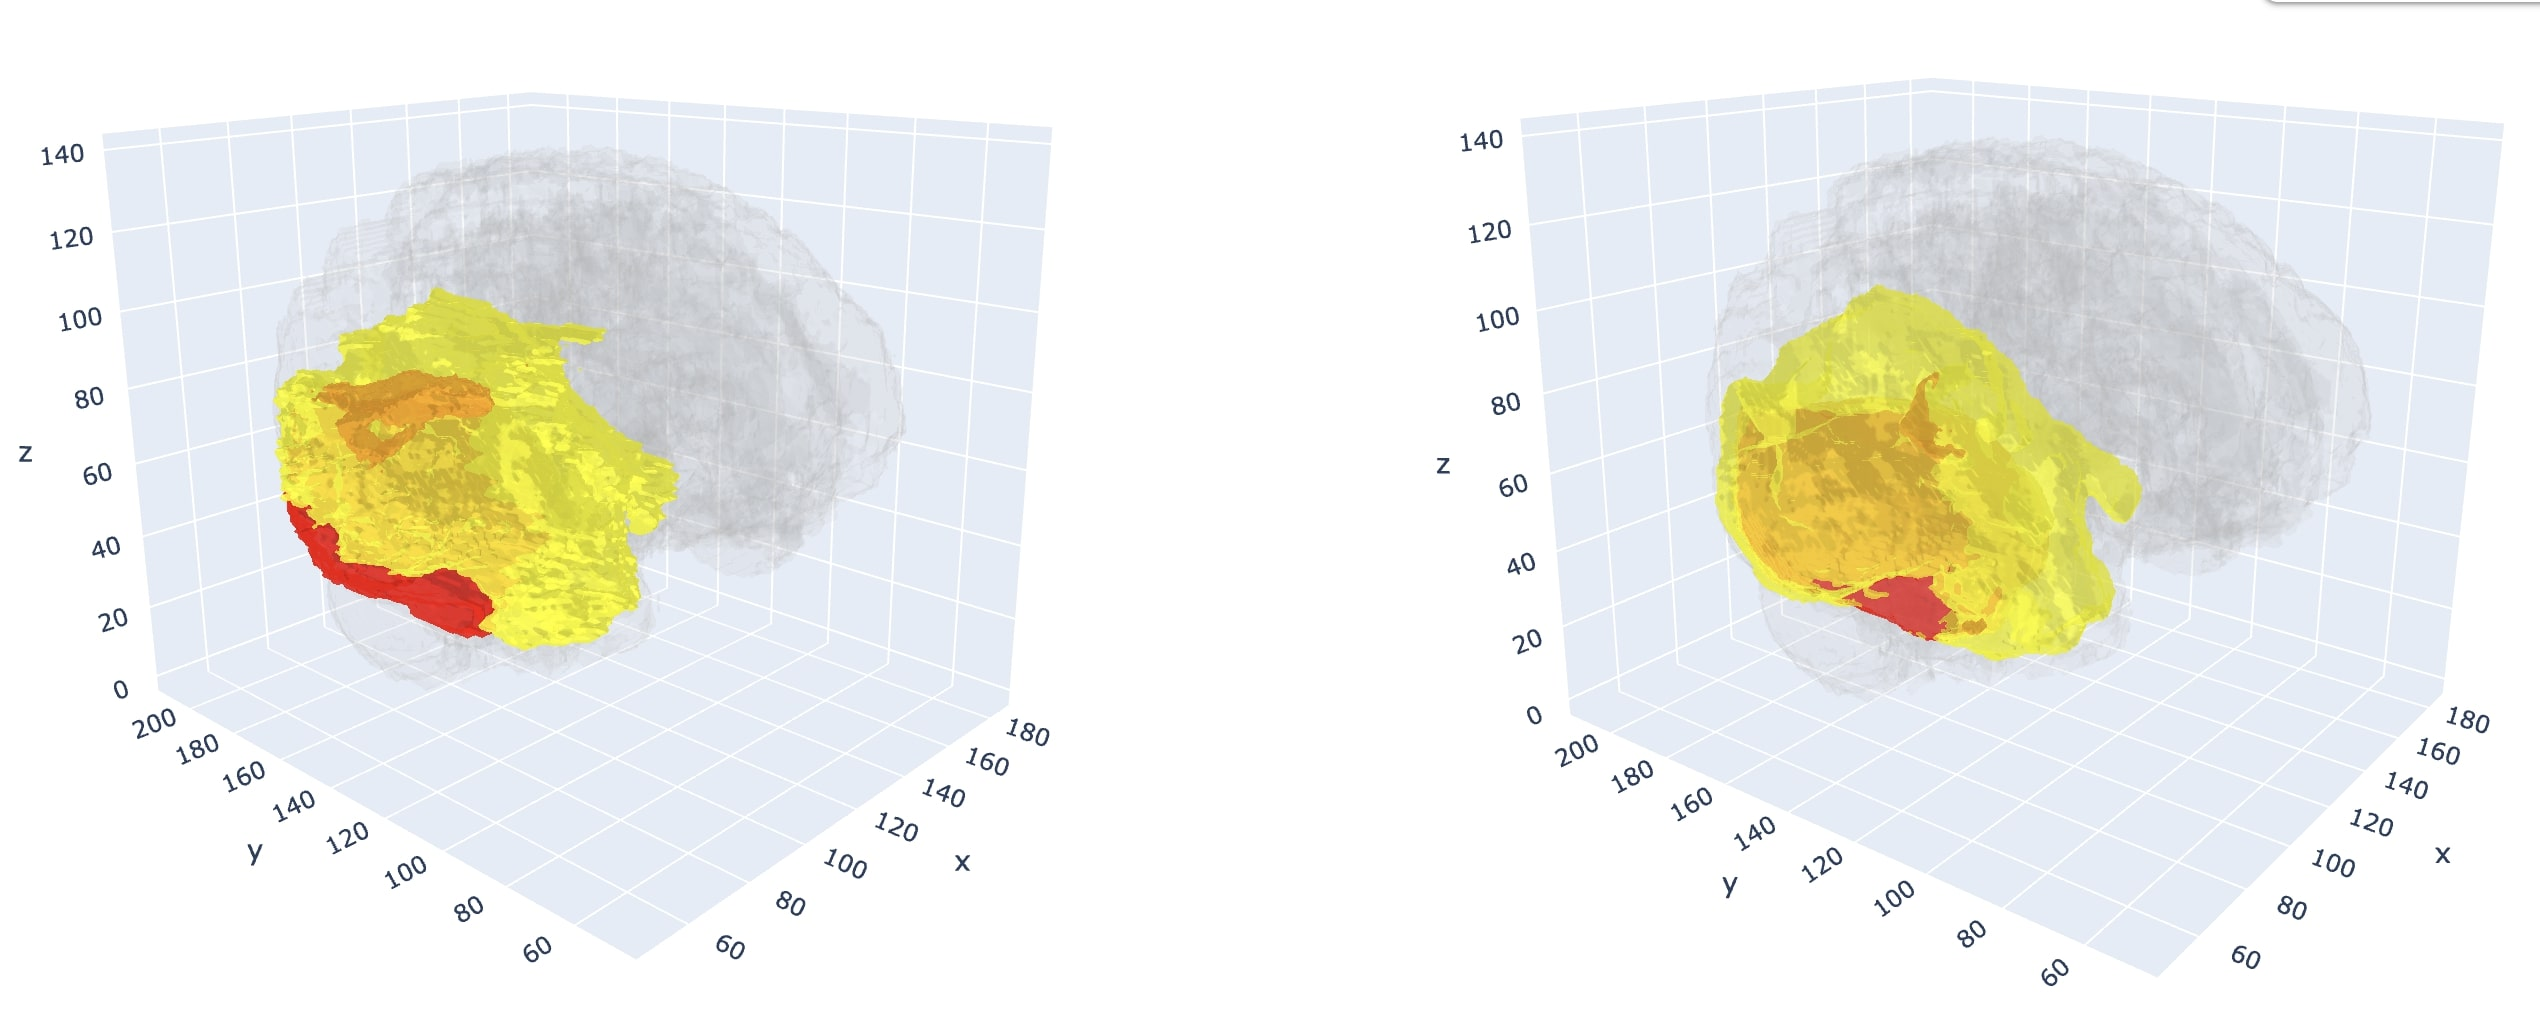